In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import pickle
from glob import glob

import bs4
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertModel, CamembertTokenizer

In [3]:
deputies_df = pd.read_pickle("../data/2017-2022/deputies.pkl")

In [4]:
groups = deputies_df.groupe_sigle.unique()
groups_to_int = dict(zip(groups, range(len(groups))))
int_to_groups = dict(zip(range(len(groups)), groups))

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
camembert_model = CamembertModel.from_pretrained("camembert-base")
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
tokenize = lambda x: tokenizer(
    x, padding="max_length", max_length=512, truncation=True, return_tensors="pt"
)

In [5]:
# files = glob("../data/2017-2022/interventions/*.json")
# file_stats = [os.stat(file).st_size for file in files]
# no_empty_files = [files[i] for i in range(len(files)) if file_stats[i] > 63]
# slug_files = [file.split("/")[-1].split(".")[0] for file in no_empty_files]
# file_dict = dict(zip(slug_files, no_empty_files))

In [156]:
# data = []

# for dep in slug_files:
#     tmp = deputies_df[deputies_df.slug == dep]

#     with open(file_dict[dep], "r", encoding="utf-8") as f:
#         ints = json.load(f)

#     ints_list = [
#         {
#             "intervention": bs4.BeautifulSoup(intervention["intervention"]).text,
#             "nb_mots": intervention["nb_mots"],
#             "seance_id": intervention["seance_id"],
#             "section_id": intervention["section_id"],
#             "type": intervention["type"],
#             "date": intervention["date"],
#         } for i, intervention in enumerate(ints["interventions"]) if i < 500
#     ]

#     tokens = tokenize([x["intervention"] for x in ints_list])

#     value = {
#         "nom_circo": tmp["nom_circo"].iloc[0],
#         "ancien_depute": tmp["ancien_depute"].iloc[0],
#         "groupe_sigle": tmp["groupe_sigle"].iloc[0],
#         "slug": tmp["slug"].iloc[0],
#         "nom": tmp["nom"].iloc[0],
#         "nb_mandats": tmp["nb_mandats"].iloc[0],
#         "nb_interventions": ints["last_result"],
#         "nb_ints": len(ints_list),
#         "interventions": ints_list,
#         "tokens": tokens,
#     }

#     data.append(value)

In [158]:
# with open("../data/2017-2022/tokenized.pkl", "wb") as f:
#     pickle.dump(data, f)
# os.stat("../data/2017-2022/tokenized.pkl").st_size

1543904072

In [162]:
# lengths = [x["nb_ints"] for x in data]
# all_input_ids = [x["tokens"]["input_ids"] for x in data]
# all_masks = [x["tokens"]["attention_mask"] for x in data]
# labels = [groups_to_int[x["groupe_sigle"]] for x in data]

In [163]:
# all_input_ids[2].shape

torch.Size([500, 512])

In [209]:
# padded_inputs = nn.utils.rnn.pad_sequence(all_input_ids, batch_first=True, padding_value=1)

In [168]:
# padded_masks = nn.utils.rnn.pad_sequence(all_masks, batch_first=True, padding_value=0)

In [166]:
# torch.save(padded_inputs, "../data/2017-2022/padded_inputs.pt")

In [215]:
# tokens_list = {
#     "tokens": padded_inputs,
#     "masks": padded_masks,
#     "interventions_masks": torch.all(padded_masks== 0, dim=2),
#     "labels": labels
# }

In [216]:
# torch.save(tokens_list, "../data/2017-2022/tokens_list.pt")

In [12]:
# with open("../data/2017-2022/tokens_lists.pkl", "rb") as f:
#     tokens_list = pickle.load(f)

In [9]:
# tokens_list = torch.load("../data/2017-2022/data_dict.pt")

In [72]:
# from sklearn.model_selection import train_test_split

# test_frac = 0.25
# X, y = np.arange(len(tokens_list["labels"])), tokens_list["labels"]
# train_idx, test_idx, y_train, y_test = train_test_split(
#     X, y,
#     stratify=y,
#     test_size=0.25
# )

In [73]:
# train_tokens_list = {
#     "tokens": tokens_list["tokens"][train_idx],
#     "masks": tokens_list["masks"][train_idx],
#     "interventions_masks": tokens_list["interventions_masks"][train_idx],
#     "labels": tokens_list["labels"][train_idx]
# }
# test_tokens_list = {
#     "tokens": tokens_list["tokens"][test_idx],
#     "masks": tokens_list["masks"][test_idx],
#     "interventions_masks": tokens_list["interventions_masks"][test_idx],
#     "labels": tokens_list["labels"][test_idx]
# }

In [74]:
# unique, count = np.unique(test_tokens_list["labels"], return_counts=True)
# test_party_count = pd.DataFrame({
#     "party": unique,
#     "count": count
# })
# test_party_count["freq"] = test_party_count["count"]/test_party_count["count"].sum()
# test_party_count["party_name"] = test_party_count["party"].apply(lambda x: int_to_groups[x])
# test_party_count["type"] = "test"


# unique, count = np.unique(train_tokens_list["labels"], return_counts=True)
# train_party_count = pd.DataFrame({
#     "party": unique,
#     "count": count
# })
# train_party_count["freq"] = train_party_count["count"]/train_party_count["count"].sum()
# train_party_count["party_name"] = train_party_count["party"].apply(lambda x: int_to_groups[x])
# train_party_count["type"] = "train"


# unique, count = np.unique(tokens_list["labels"], return_counts=True)
# party_count = pd.DataFrame({
#     "party": unique,
#     "count": count
# })
# party_count["freq"] = party_count["count"]/party_count["count"].sum()
# party_count["party_name"] = party_count["party"].apply(lambda x: int_to_groups[x])
# party_count["type"] = "total"

# party_count = pd.concat([party_count, train_party_count, test_party_count])

<AxesSubplot: xlabel='party_name', ylabel='freq'>

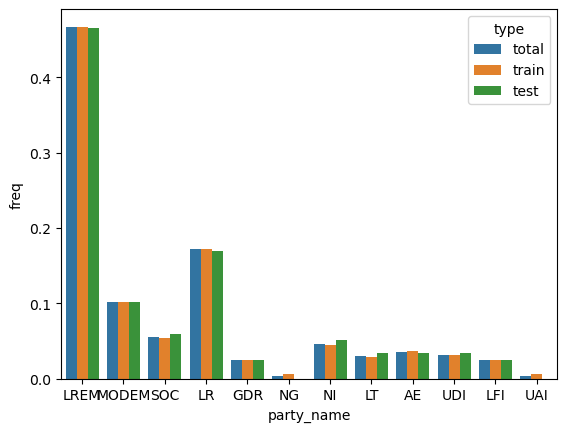

In [76]:
# sns.barplot(x="party_name", y="freq", hue="type", data=party_count)

In [77]:
# torch.save(train_tokens_list, "../data/2017-2022/train_data.pt")
# torch.save(test_tokens_list, "../data/2017-2022/test_data.pt")

In [8]:
train_dict = torch.load("../data/2017-2022/train_data.pt")
test_dict = torch.load("../data/2017-2022/test_data.pt")

In [9]:
train_dict.keys()

dict_keys(['tokens', 'masks', 'interventions_masks', 'labels'])

In [10]:
class InterventionsDataset(Dataset):
    def __init__(self, dict_data):
        self.labels = dict_data["labels"]
        self.masks = dict_data["masks"]
        self.tokens = dict_data["tokens"]
        self.interventions_masks = dict_data["interventions_masks"]

    def __len__(self):
        return len(self.labels)

    def get_batch_texts(self, idx):
        return {
            "tokens": self.tokens[idx],
            "masks": self.masks[idx],
            "interventions_masks": self.interventions_masks[idx],
        }

    def get_batch_labels(self, idx):
        return self.labels[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [11]:
train_dataset = InterventionsDataset(train_dict)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = InterventionsDataset(test_dict)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [12]:
x, y = next(iter(train_dataloader))

In [13]:
x["tokens"].shape

torch.Size([32, 500, 512])

In [20]:
torch.cuda.empty_cache()

In [21]:
camembert_model = CamembertModel.from_pretrained("camembert-base")
camembert_model.cuda();

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


OutOfMemoryError: CUDA out of memory. Tried to allocate 94.00 MiB (GPU 0; 7.80 GiB total capacity; 6.27 GiB already allocated; 93.56 MiB free; 6.33 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [17]:
input_ids = x["tokens"][:, 1, :].to(device=device)
attention_mask = x["masks"][:, 1, :].to(device=device)

In [18]:
for i in range(x.shape[0]):
    input_ids = x["tokens"][:, i, :]
    attention_mask = x["masks"][:, i, :]
    camembert_model(input_ids=input_ids, attention_mask=attention_mask)

OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB (GPU 0; 7.80 GiB total capacity; 6.32 GiB already allocated; 31.31 MiB free; 6.37 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [26]:
class SimpleCamembertClassifier(nn.Module):
    def __init__(
        self,
        num_classes=11,
        bert_model=camembert_model,
        bert_dim=768,
        input_dim=256,
        embed_dim=256,
        input_dim2=256,
        num_heads=8,
        dropout=0.2,
    ):
        super(SimpleCamembertClassifier, self).__init__()

        # Set the parameters
        self.bert_dim = bert_dim
        self.input_dim = input_dim
        self.embed_dim = embed_dim
        self.input_dim2 = input_dim2
        self.num_attention_heads = num_heads
        self.attention_head_dim = input_dim // num_heads

        # Initialize the BERT model
        self.bert_model = bert_model

        # Initialize the linear layers for the multi-head attention
        self.query_linear = nn.Linear(bert_dim, input_dim)
        self.key_linear = nn.Linear(bert_dim, input_dim)
        self.value_linear = nn.Linear(bert_dim, input_dim)

        # Initialize the multi-head attention layer
        self.attention_layer = nn.MultiheadAttention(
            embed_dim=self.embed_dim, num_heads=num_heads, batch_first=True
        )

        # Initialize the linear layers for the output projection
        self.linear1 = nn.Linear(input_dim, input_dim2)
        self.linear2 = nn.Linear(input_dim, num_classes)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, tokens, masks, interventions_masks):
        """
        tokens (batch_size, nb_int, nb_tokens)
        masks (batch_size, nb_int, nb_tokens)
        interventions_masks (batch_size, nb_int)
        """
        pooled_output = self.bert_model(
            input_ids=tokens, attention_mask=masks, return_dict=False
        )  # (batch_size, nb_int, bert_dim)

        # Add a zero padding for CLS in attention
        pooled_output_with_cls = F.pad(
            pooled_output, pad=(0, 0, 1, 0), mode="constant", value=0.0
        )  # (batch_size, nb_int + 1, bert_dim)

        # Split the input tensors into the different attention heads
        query_heads = self.query_linear(
            pooled_output_with_cls
        )  # (batch_size, nb_int + 1, input_dim)
        key_heads = self.key_linear(pooled_output_with_cls)  # (batch_size, nb_int + 1, input_dim)
        value_heads = self.value_linear(pooled_output_with_cls)  # (batch_size, input_dim)

        # Apply the multi-head attention
        attn_output = self.attention_layer(
            query_heads,
            key_heads,
            value_heads,
            key_padding_mask=interventions_masks,
            need_weights=False,
        )  # (batch_size, input_dim)

        deputy_repr = attn_output[:, 0, :]  # (batch_size, input_dim)

        dropout_output1 = self.dropout1(deputy_repr)
        linear_output1 = nn.ReLU(self.linear1(dropout_output1))  # (batch_size, input_dim2)
        dropout_output2 = self.dropout2(linear_output1)
        linear_output2 = nn.ReLU(self.linear2(dropout_output2))  # (batch_size, num_classes)

        final_layer = nn.Softmax(linear_output2)  # (batch_size, num_classes)

        return final_layer

In [27]:
from torch.optim import Adam
from tqdm import tqdm


def train(model, train_data, val_data, learning_rate, epochs):

    train, val = InterventionsDataset(train_data), InterventionsDataset(val_data)

    train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
    val_dataloader = DataLoader(val, batch_size=32)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    for epoch_num in range(epochs):
        total_acc_train = 0
        total_loss_train = 0

        for train_input, train_label in tqdm(train_dataloader):
            train_label = train_label.to(device)
            tokens = train_input["tokens"].squeeze(1).to(device)
            masks = train_input["masks"].to(device)
            interventions_masks = train_input["interventions_masks"].to(device)

            output = model(tokens, masks, interventions_masks)

            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()

            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_acc_val = 0
        total_loss_val = 0

        with torch.no_grad():

            for val_input, val_label in val_dataloader:

                val_label = val_label.to(device)
                mask = val_input["attention_mask"].to(device)
                input_id = val_input["input_ids"].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()

                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc

        print(
            f"Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}"
        )

In [28]:
EPOCHS = 5
model = SimpleCamembertClassifier()
LR = 1e-4

train(model, train_dict, test_dict, LR, EPOCHS)

  0%|          | 0/12 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input["attention_mask"].to(device)
            input_id = test_input["input_ids"].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc

    print(f"Test Accuracy: {total_acc_test / len(test_data): .3f}")


evaluate(model, test_dict)

In [22]:
?camembert_model

Signature:      camembert_model(*input, **kwargs)
Type:           CamembertModel
String form:   
CamembertModel(
           (embeddings): CamembertEmbeddings(
           (word_embeddings): Embedding(32005, 768, <...>
           (dense): Linear(in_features=768, out_features=768, bias=True)
           (activation): Tanh()
           )
           )
File:           ~/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/transformers/models/camembert/modeling_camembert.py
Docstring:     
The bare CamemBERT Model transformer outputting raw hidden-states without any specific head on top.

This model inherits from [`PreTrainedModel`]. Check the superclass documentation for the generic methods the
library implements for all its model (such as downloading or saving, resizing the input embeddings, pruning heads
etc.)

This model is also a PyTorch [torch.nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) subclass.
Use it as a regular PyTorch Module and refer to the PyTorch doc